In [21]:
import pandas as pd

In [22]:

data = pd.read_csv(r'data\51stKIAP_vs_36th_Round_1\Plane\Allies_PlaneId_105.csv', usecols=['Unix time', 'Roll', 'Pitch', 'Yaw', 'Longitude', 'Latitude','Altitude'])
# 设置 Unix time 为 index，并且保留这一列
data.set_index('Unix time', inplace=True, drop=False)
data.head()

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw
Unix time,,,,,,,
0,0,53.342343,26.814854,25.2,-0.1,-1.4,110.4
1,1,53.342343,26.814854,25.2,-0.1,-1.4,110.4
2,2,53.342343,26.814854,25.2,-0.1,-1.4,110.4
3,3,53.342343,26.814854,25.2,-0.1,-1.4,110.4
4,4,53.342343,26.814854,25.2,-0.1,-1.4,110.4


In [23]:
times = []

# 找到 Roll 在 -20 与 -70 之间的时间
for i in range(len(data)):
    if data.iloc[i]['Pitch'] > -80 and data.iloc[i]['Pitch'] < -7.5:
        times.append(data.iloc[i]['Unix time'])


# 遍历times, 转换为times_
times_ = []
temp = []
for i in range(len(times)):
    temp.append(times[i])
    if times[i] + 1 not in times:
        times_.append(temp)
        temp = []

# 求俯仰角累积变化量
pitch_acc = []
for i in range(len(times_)):
    temp = 0
    for j in range(len(times_[i]) - 1):
        temp += abs(data.loc[times_[i][j+1]]['Pitch'] - data.loc[times_[i][j]]['Pitch'])
    pitch_acc.append(temp)

flag = []
for i in range(len(pitch_acc)):
    # if pitch_acc[i] > 20 and pitch_acc[i] < 80:
    flag.append(i)



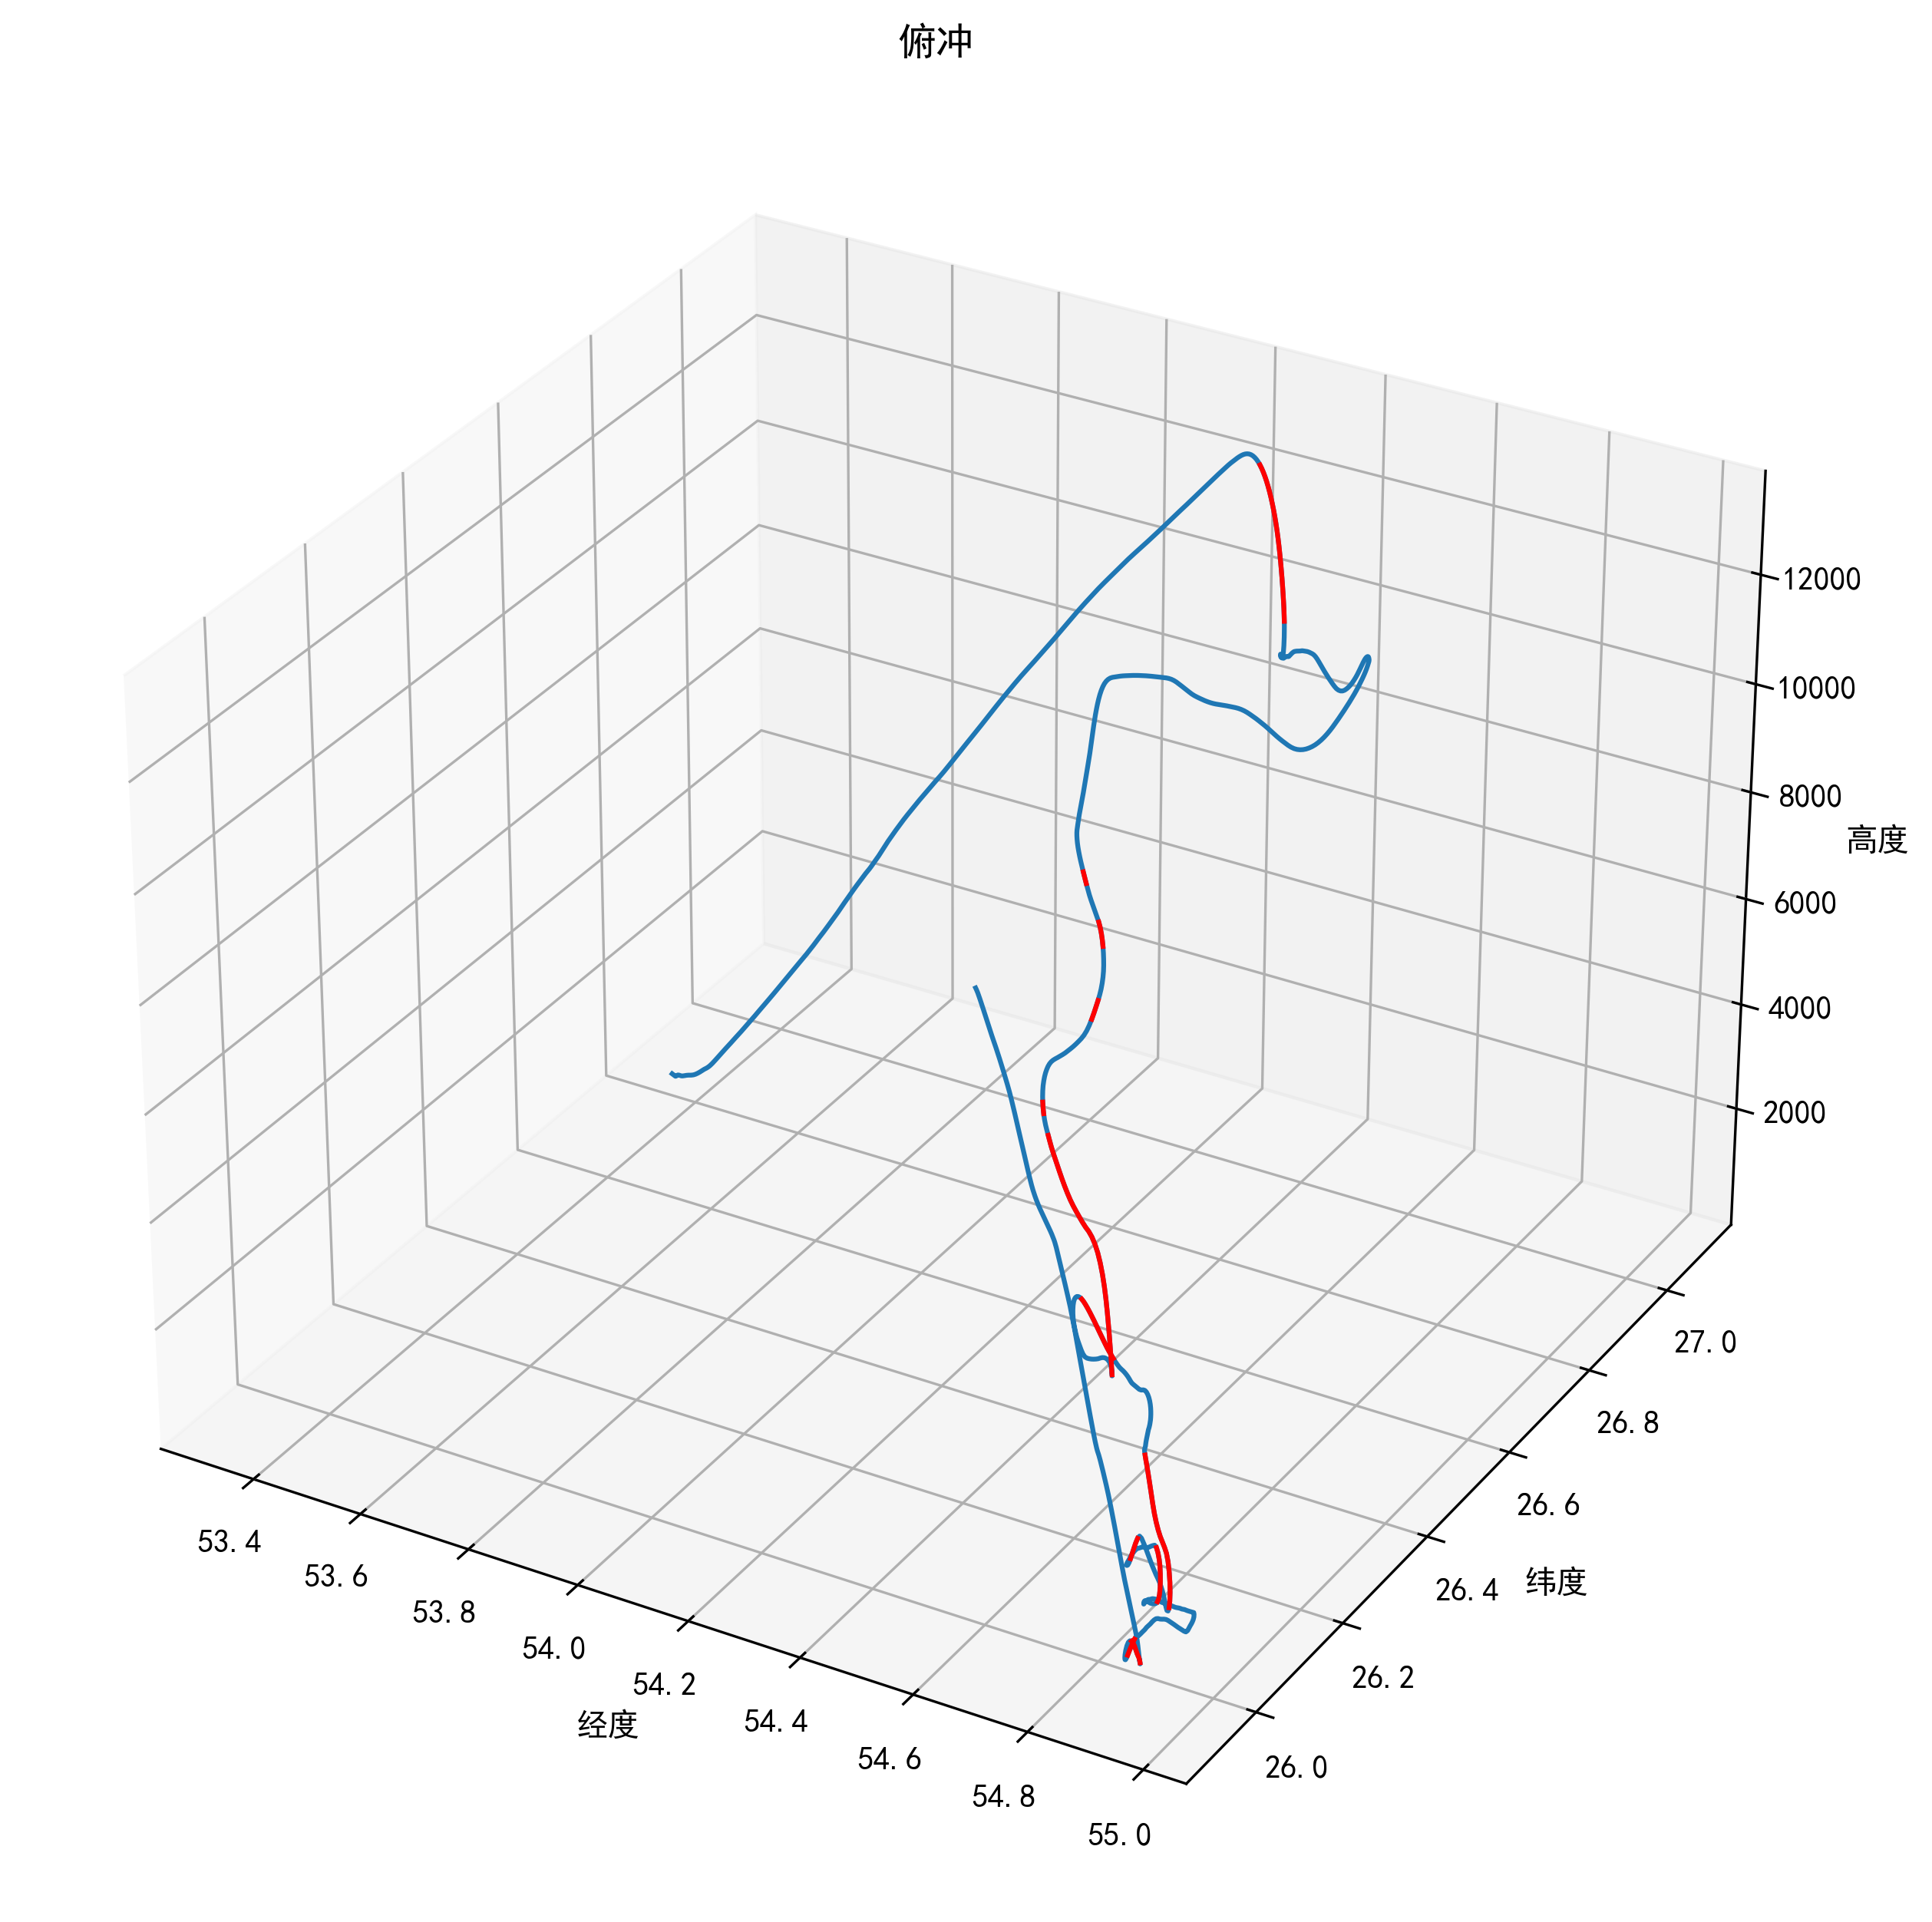

[[54.2381923,
  54.2414588,
  54.2447498,
  54.2480197,
  54.2512775,
  54.25457,
  54.2578209,
  54.2610812,
  54.2643226,
  54.2675697,
  54.2707619,
  54.2739377,
  54.2771003,
  54.2801868,
  54.2832619,
  54.2862687,
  54.2892489,
  54.2921644,
  54.2950688,
  54.2979301,
  54.300744,
  54.3035143,
  54.306212,
  54.3087875,
  54.311282],
 [54.6076466, 54.6118475, 54.6160644],
 [54.6336282],
 [54.6473136, 54.6515254, 54.6555356, 54.6592664, 54.662774],
 [54.6691476],
 [54.6814776, 54.6815485, 54.6812036, 54.6804918],
 [54.6771684, 54.6801427, 54.6833679],
 [54.6982046,
  54.7022109,
  54.706257,
  54.7104395,
  54.714758,
  54.7191243,
  54.7235162,
  54.7279677,
  54.7323799,
  54.7367596,
  54.7411653,
  54.7455269,
  54.7498956,
  54.7542657,
  54.7586658,
  54.7630044,
  54.7671248,
  54.7707626,
  54.7739368,
  54.7765632,
  54.7786059,
  54.7800605,
  54.7809668,
  54.7813062,
  54.7811545,
  54.7806303,
  54.7797744,
  54.7786065,
  54.7771694,
  54.775439,
  54.7735039,
  

In [24]:
# 获取经度、维度、高度
longitude = []
latitude = []
altitude = []
for i in range(len(data['Longitude'].to_list())):
    longitude.append(data['Longitude'].to_list()[i])
    latitude.append(data['Latitude'].to_list()[i])
    altitude.append(data['Altitude'].to_list()[i])


longitude1 = []
latitude1 = []
altitude1 = []
for i in range(len(flag)):
    temp_long = []
    temp_lat = []
    temp_alt = []
    for j in range(len(times_[flag[i]])):
        temp_long.append(data.loc[times_[flag[i]][j]]['Longitude'])
        temp_lat.append(data.loc[times_[flag[i]][j]]['Latitude'])
        temp_alt.append(data.loc[times_[flag[i]][j]]['Altitude'])
    longitude1.append(temp_long)
    latitude1.append(temp_lat)
    altitude1.append(temp_alt)




# 绘制三维轨迹图
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(longitude, latitude, altitude)
# 绘制在同一张图上一条红线
for i in range(len(longitude1)):
    ax.plot(longitude1[i], latitude1[i], altitude1[i], color='r')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高度')

# 设置DPI为300
fig.set_dpi(300)
# 设置图片大小
fig.set_size_inches(18.5, 10.5)
# 设置标题
plt.title('俯冲')
# 保存图片
plt.savefig('./fig/俯冲.png', dpi=300)
plt.show()
longitude1 
